In [1]:
import pandas as pd
import numpy as np

In [12]:
alsi = pd.read_csv("Dataset/Mercury/alsimap_smooth_032015.png.csv", header = None) 
casi = pd.read_csv("Dataset/Mercury/casimap_smooth_032015.png.csv", header = None) 
fesi = pd.read_csv("Dataset/Mercury/fesimap_smooth_032015.png.csv", header = None) 
mgsi = pd.read_csv("Dataset/Mercury/mgsimap_smooth_032015.png.csv", header = None) 
ssi = pd.read_csv("Dataset/Mercury/ssimap_smooth_032015.png.csv", header = None) 
top = pd.read_csv("Dataset/Mercury/mercury-albedo-top-half.png.csv", header = None) 
bottom = pd.read_csv("Dataset/Mercury/mercury-albedo-resized-bottom-half.png.csv", header = None) 

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'bottom half of Mercury Albedo')

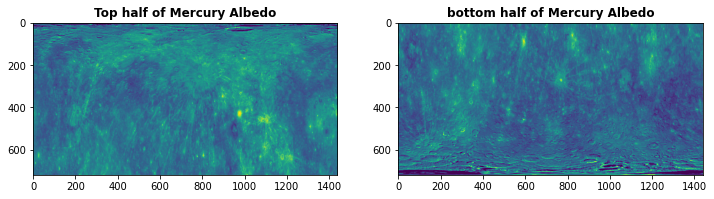

In [14]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(top)
plt.title('Top half of Mercury Albedo', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(bottom)
plt.title('bottom half of Mercury Albedo', fontweight="bold")

### Filling gaps

Text(0.5, 1.0, 'ALSI without gaps')

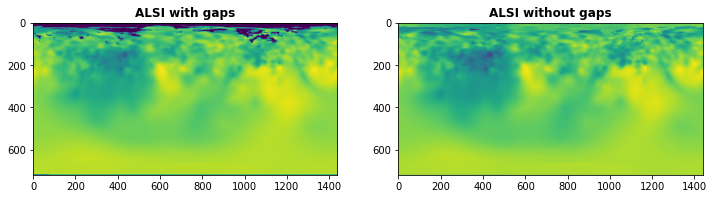

In [15]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(alsi)
plt.title('ALSI with gaps', fontweight="bold")

alsi_mean = alsi.replace(0E+00, alsi.mean())

plt.subplot(1, 2, 2)
plt.imshow(alsi_mean)
plt.title('ALSI without gaps', fontweight="bold")

In [18]:
alsi_mean.std().sum()

122.94801210708867

Text(0.5, 1.0, 'ALSI without gaps')

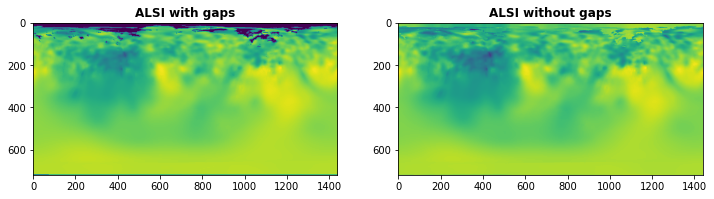

In [16]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(alsi)
plt.title('ALSI with gaps', fontweight="bold")

alsi_median = alsi.replace(0E+00, alsi.median())

plt.subplot(1, 2, 2)
plt.imshow(alsi_median)
plt.title('ALSI without gaps', fontweight="bold")

In [19]:
alsi_median.std().sum()

122.29112638414719

<font color='red'> On comparing the standard deviations of both data. Imputing gaps with median is giving better results.

### Data split

In [26]:
x_train = top
y_train = alsi
x_test = bottom
y_test = alsi

We are not using XGBRegressor for this problem because size of dataset is large and computation time of XGBRegressor is very long.

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators= 15, random_state=0))
regressor.fit(x_train, y_train)
y_pred = regressor.predict(bottom)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

In [ ]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(top)
plt.title('Top half of Mercury Albedo', fontweight="bold")
plt.colorbar(orientation='horizontal', ticks=[])

plt.subplot(1, 2, 2)
plt.imshow(alsi)
plt.title('Mercury Al/Si', fontweight="bold")
plt.colorbar(orientation='horizontal', label= 'Al/Si \n (Low to High)')

plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(bottom)
plt.colorbar(orientation='horizontal', ticks=[])
plt.title('Bottom half of Mercury Albedo', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(y_pred)
plt.colorbar(orientation='horizontal', label= 'Al/Si \n (Low to High)')
plt.title('Predicted Image', fontweight="bold")